1)	Load in the appropriate csv file as a pandas dataframe 


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Batting (1).csv")
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


2)	Print out the dimensions and info about the dataframe you just created.

In [3]:
df.shape


(102816, 25)

In [4]:
df.size

2570400

In [5]:
len(df)

102816

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

3)	How many players have hit 40 or more HRs in one single season? 

In [7]:
a=df.groupby(["yearID","playerID"])[['HR']].sum()

In [8]:
b=list(a['HR'] > 39)

In [9]:
count = 0
for i in b:
    if i == True:
        count=count+1
print(count)     

330


4)	How many players have hit 600 or more HRs for their career? 

In [10]:
p_S=df.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()

In [11]:
a=p_S[p_S >= 600]
a.reset_index()

,playerID,nameFirst,nameLast,HR
0,aaronha01,Hank,Aaron,755
1,bondsba01,Barry,Bonds,762
2,griffke02,Ken,Griffey,630
3,mayswi01,Willie,Mays,660
4,rodrial01,Alex,Rodriguez,696
5,ruthba01,Babe,Ruth,714
6,sosasa01,Sammy,Sosa,609
7,thomeji01,Jim,Thome,612


5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 


In [12]:
X=df.groupby(['yearID','playerID'])['2B','3B','H','HR'].sum().reset_index() 

In [13]:
a=X[(X['2B'] >= 40) & (X['3B'] > 9) & (X['H'] >= 200) & (X['HR'] >= 30)]

In [14]:
a['playerID'].nunique()

11

6)	How many players seasons have had 100 or more SBs? 

In [15]:
HJ=df.groupby(['yearID','playerID','nameFirst','nameLast'])['SB'].sum().reset_index()

In [16]:
a=HJ[HJ['SB'] >= 100]
b=a.reset_index()
b.drop(['playerID', 'index'], axis=1 , inplace=True)
b.sort_values(by=['SB'], ascending=False)  

,yearID,nameFirst,nameLast,SB
4,1887,Hugh,Nicol,138.0
15,1982,Rickey,Henderson,130.0
3,1887,Arlie,Latham,129.0
13,1974,Lou,Brock,118.0
1,1887,Charlie,Comiskey,117.0
5,1887,John,Ward,111.0
8,1889,Billy,Hamilton,111.0
11,1891,Billy,Hamilton,111.0
17,1985,Vince,Coleman,110.0
19,1987,Vince,Coleman,109.0


7)	How many players in the 1960s (yearID) have hit 200 or more HRs? 

In [17]:
a=df[(df['yearID']>=1960) & (df['yearID']<=1969)]
HJ=a.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().reset_index()

In [18]:
h=HJ[(HJ['HR']>=200)]
h.reset_index()

,index,playerID,nameFirst,nameLast,HR
0,0,aaronha01,Hank,Aaron,375
1,19,allisbo01,Bob,Allison,225
2,70,bankser01,Ernie,Banks,269
3,279,cashno01,Norm,Cash,278
4,283,cepedor01,Orlando,Cepeda,254
5,323,colavro01,Rocky,Colavito,245
6,751,howarfr01,Frank,Howard,288
7,830,kalinal01,Al,Kaline,210
8,856,killeha01,Harmon,Killebrew,393
9,1009,mantlmi01,Mickey,Mantle,256


In [19]:
h.drop(['playerID'], axis=1 , inplace=True)
h.sort_values(by=['HR'], ascending=False)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,nameFirst,nameLast,HR
856,Harmon,Killebrew,393
0,Hank,Aaron,375
1044,Willie,Mays,350
1372,Frank,Robinson,316
1057,Willie,McCovey,300
751,Frank,Howard,288
279,Norm,Cash,278
70,Ernie,Banks,269
1009,Mickey,Mantle,256
283,Orlando,Cepeda,254


8)	Who has hit the most HRs in history? 

In [20]:
HJ=df.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().to_frame()
a=HJ.loc[HJ['HR'].idxmax()]
b=a.to_frame()
c=b.transpose().reset_index()
c.drop(['level_0'], axis=1 , inplace=True)
c.columns = ['nameFirst', 'nameLast' , 'HR']
c

,nameFirst,nameLast,HR
0,Barry,Bonds,762


9)	Who had the most hits (H) in the 1970s? 

In [21]:
a=df[(df['yearID']>=1970) & (df['yearID']<=1979)]
HJ=a.groupby(['playerID','nameFirst','nameLast'])['H'].sum().reset_index()
t=HJ.loc[HJ['H'].idxmax()]
b=t.to_frame()
c=b.transpose().reset_index()
c.drop(['index'], axis=1 , inplace=True)
c

,playerID,nameFirst,nameLast,H
0,rosepe01,Pete,Rose,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  

In [22]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'])['H','IBB','HBP','AB','SH','SF','BB'].sum()
df1['OBP']=(df1['H']+df1['IBB']+df1['HBP'])/(df1['AB']+df1['IBB']+df1['HBP']+df1['SF'])
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SF']+df1['SH']
x=df1.reset_index()
t=x[(x['yearID']==1977) & (x['PA']>=500)]
a=t.sort_values(by=['OBP'], ascending=False).head()
z=a[['nameFirst','nameLast','OBP']]
e=z.reset_index()
e.drop(['index'], axis=1 , inplace=True)
e

,nameFirst,nameLast,OBP
0,Rod,Carew,0.402191
1,Dave,Parker,0.355522
2,Ted,Simmons,0.349177
3,Lyman,Bostock,0.343137
4,Ken,Singleton,0.342908


11)	Top 8 highest averages in 2013 with at least 300 PAs? 

In [23]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'])['G','R','HBP','AB','SH','SF','BB','H'].sum()
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SF']+df1['SH']
df2=df1.reset_index()
a=df2[(df2['yearID']==2013) & (df2['PA']>=300)]
a['Average']= a['H'] / a['AB']
x=a.sort_values(by=['Average'], ascending=False).head(8)
t=x[['nameFirst','nameLast','Average']]
e=t.reset_index()
e.drop(['index'], axis=1 , inplace=True)
e

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,Average
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


12)	Leaders in hits from 1940 up to and including 1949? 

In [24]:
a=df[(df['yearID']>=1940) & (df['yearID']<=1949)]
HJ=a.groupby(['playerID','nameFirst','nameLast'])['H'].sum().reset_index()
HJ.drop(['playerID'], axis=1 , inplace=True)
x=HJ.sort_values(by=['H'], ascending=False).head()
w=x.reset_index()
w.drop(['index'], axis=1 , inplace=True)
w

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


13)	Who led MLB with the most hits the most times?  And how many times?  

In [25]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'])[['H']].sum().reset_index()
df1
a=df1.groupby(['yearID']).agg({'H':'max'}).reset_index()
#a.to_excel('Excel_Sample1.xlsx',sheet_name='Sheet1')
x=pd.merge(df1, a, on=['yearID', 'H'])
#x.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

a=x['playerID'].value_counts().reset_index()
a.columns = ['playerID', 'NumberofHits']
t=a.iloc[0:3]
t
    
    

,playerID,NumberofHits
0,suzukic01,7
1,cobbty01,7
2,rosepe01,7


14) Which players have played the most games for their careers?  

In [26]:
df1=df.groupby(['playerID','nameFirst','nameLast'])[['G']].sum().reset_index()
a=df1.sort_values(by=['G'], ascending=False).head()
x=a.reset_index()
x.drop(['index','playerID'], axis=1 , inplace=True)
x

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  


In [27]:
df1=df.groupby(['playerID'])['H','HR'].sum().reset_index()
df1
a=df1[(df1['H'] >= 3000) & (df1['HR'] >= 500)]
len(a)

5

16) How many HRs were hit during the entire 1988 season?  

In [28]:
a=df[df['yearID']==1988]
HJ=a.groupby(['yearID'])['HR'].sum().reset_index()
HJ

,yearID,HR
0,1988,3180


17)Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs?

In [29]:
a=df[(df['nameFirst']=='Wade') & (df['nameLast']=='Boggs') & (df['AB']>=500)]
a['Average']= a['H'] / a['AB']
x=a.sort_values(by=['Average'], ascending=False).head(3)
t=x[['nameFirst','nameLast','Average']]
e=t.reset_index()
e.drop(['index'], axis=1 , inplace=True)
e
#t.drop(('index'), axis=1 , inplace=True)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,Average
0,Wade,Boggs,0.367534
1,Wade,Boggs,0.366438
2,Wade,Boggs,0.362976


18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  

In [30]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'])['H','IBB','HBP','AB','SH','SF','BB'].sum()
df1['OBP']=(df1['H']+df1['IBB']+df1['HBP'])/(df1['AB']+df1['IBB']+df1['HBP']+df1['SF'])
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SF']+df1['SH']
x=df1.reset_index()
t=x[(x['yearID']==1995) & (x['PA']>=400)]
a=t.sort_values(by=['OBP'], ascending=False).head(10)
z=a[['nameFirst','nameLast','OBP']]
e=z.reset_index()
e.drop(['index'], axis=1 , inplace=True)
e

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.385609
1,Tony,Gwynn,0.376812
2,Mike,Piazza,0.360987
3,Chuck,Knoblauch,0.346570
4,Frank,Thomas,0.346296
5,Dante,Bichette,0.346218
6,Derek,Bell,0.344017
7,Bobby,Bonilla,0.340351
8,Larry,Walker,0.338403
9,Tim,Salmon,0.336976


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  

In [31]:
df = pd.read_csv("Batting (1).csv")
df1=df[(df['yearID']==1922) | (df['yearID']==1925) | (df['yearID']==1926) | (df['yearID']==1928)]
df2=df1.groupby(['playerID','nameFirst','nameLast'])['3B'].sum().reset_index()
x=df2.sort_values(by=['3B'], ascending=False).head(1)
e=x.reset_index()
e.drop(['index','playerID'], axis=1 , inplace=True)
e

,nameFirst,nameLast,3B
0,Curt,Walker,59


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  

In [32]:
x=df.groupby(['yearID','playerID','nameFirst','nameLast'])['HR','SB'].sum().reset_index()
t=x[(x['HR']>=30) & (x['SB']>=30)]
t['playerID'].nunique()

38

21) Who had the highest OBP in 1986 with 400 or more ABs? 

In [33]:
x=df[df['yearID']==1986]
df1=x.groupby(['playerID','nameFirst','nameLast'])['H','IBB','HBP','AB','SF'].sum()
df1['OBP']=(df1['H']+df1['IBB']+df1['HBP'])/(df1['AB']+df1['IBB']+df1['HBP']+df1['SF'])
a=df1.reset_index()
t=a[a['AB']>=400]
w=t.sort_values(by=['OBP'], ascending=False).head(1)
c=w[['nameFirst','nameLast','OBP']]
u=c.reset_index()
u.drop(['index'], axis=1 , inplace=True)
u

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.369565


22)	Same question but for 1997 and only in the NL (check league ID)? 

In [34]:
x=df[(df['yearID']==1997) & (df['lgID']=='NL')]
df1=x.groupby(['playerID','nameFirst','nameLast'])['H','IBB','HBP','AB','SF'].sum()
df1['OBP']=(df1['H']+df1['IBB']+df1['HBP'])/(df1['AB']+df1['IBB']+df1['HBP']+df1['SF'])
a=df1.reset_index()
t=a[a['AB']>=400]
w=t.sort_values(by=['OBP'], ascending=False).head(1)
c=w[['nameFirst','nameLast','OBP']]
u=c.reset_index()
u.drop(['index'], axis=1 , inplace=True)
u

,nameFirst,nameLast,OBP
0,Larry,Walker,0.393333


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? 

In [46]:
x=df[df['yearID']==2012]
df1=x.groupby(['playerID','nameFirst','nameLast'])['HR','AB'].sum()
a=df1[df1['AB']>=500]
t=a.reset_index()
totalHRSum=t.sum()['HR']
totalPlayers=len(t)
leagueAverage = totalHRSum / totalPlayers
hj=t[t['HR'] >= leagueAverage]
z=hj.sort_values(by=['HR'], ascending=False)
u=z.reset_index()
u.drop(['index','playerID','AB'], axis=1 , inplace=True)
u

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


24) Who is the youngest player to hit 50 or more HRs in a single season? 

In [36]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'])['HR'].sum().reset_index()
df1['Age'] = df1['yearID'] - df1['birthYear']
x=df1[df1['HR']>=50]
z=x.sort_values(by=['Age'], ascending=True)
t=z.head(1)
u=t[['yearID','nameFirst','nameLast','HR']]
v=u.reset_index()
v.drop(['index'], axis=1 , inplace=True)
v

,yearID,nameFirst,nameLast,HR
0,2007,Prince,Fielder,50


25)	Who are the five youngest players to hit 300 or more HRs for their career? 

In [59]:
df = pd.read_csv("Batting (1).csv")
df['Age'] = df['yearID'] - df['birthYear']
df1 = df.groupby(['nameFirst','nameLast','Age','yearID'])['HR'].sum().reset_index()
df1['HR_total'] = df1.groupby(['nameFirst','nameLast'])['HR'].cumsum()
df2 = df1.sort_values('Age')
x=df2[df2['HR_total']>=300]
y=x.head(10)
v=y.reset_index()
v.drop(['index','HR'], axis=1 , inplace=True)
v

,nameFirst,nameLast,Age,yearID,HR_total
0,Mel,Ott,28,1937,306
1,Ken,Griffey,28,1997,331
2,Andruw,Jones,28,2005,301
3,Alex,Rodriguez,28,2003,345
4,Albert,Pujols,28,2008,319
5,Frank,Thomas,28,1957,310
6,Frank,Thomas,28,1996,350
7,Jimmie,Foxx,28,1935,302
8,Miguel,Cabrera,29,2012,321
9,Andruw,Jones,29,2006,342


26) BONUS:  Graph total HRs per season using bar graph

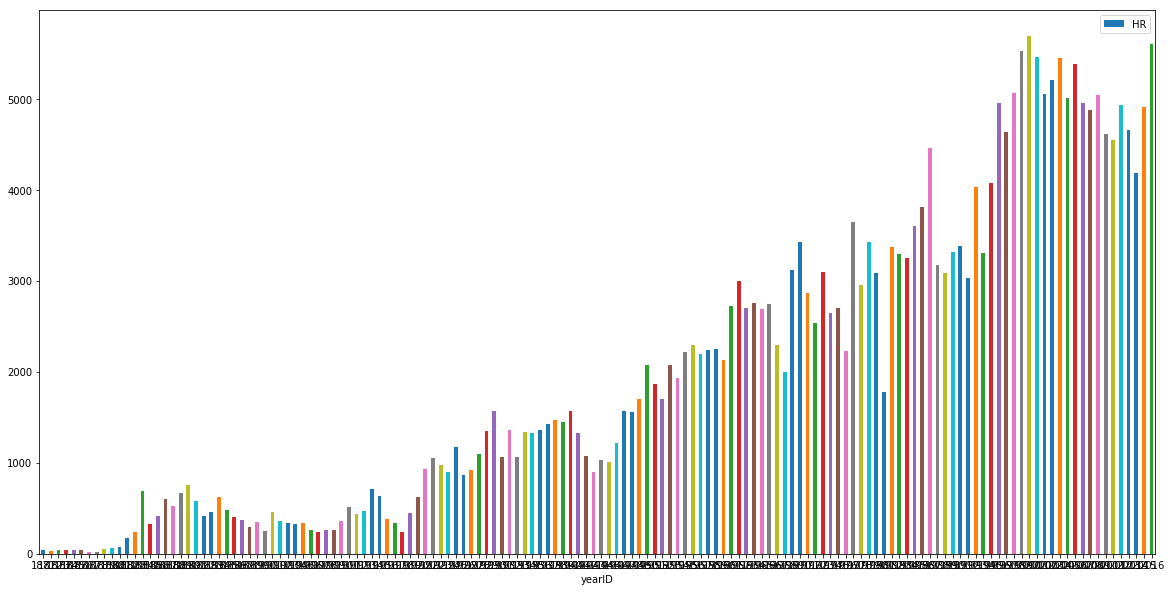

In [41]:
df1=df.groupby(['yearID'])['HR'].sum().reset_index()
Graph = df1.plot.bar(x='yearID', y='HR', figsize=(20,10), rot=0)
Graph

27) Using a line graph please graph the average HRs per AB (think about this) per season ?

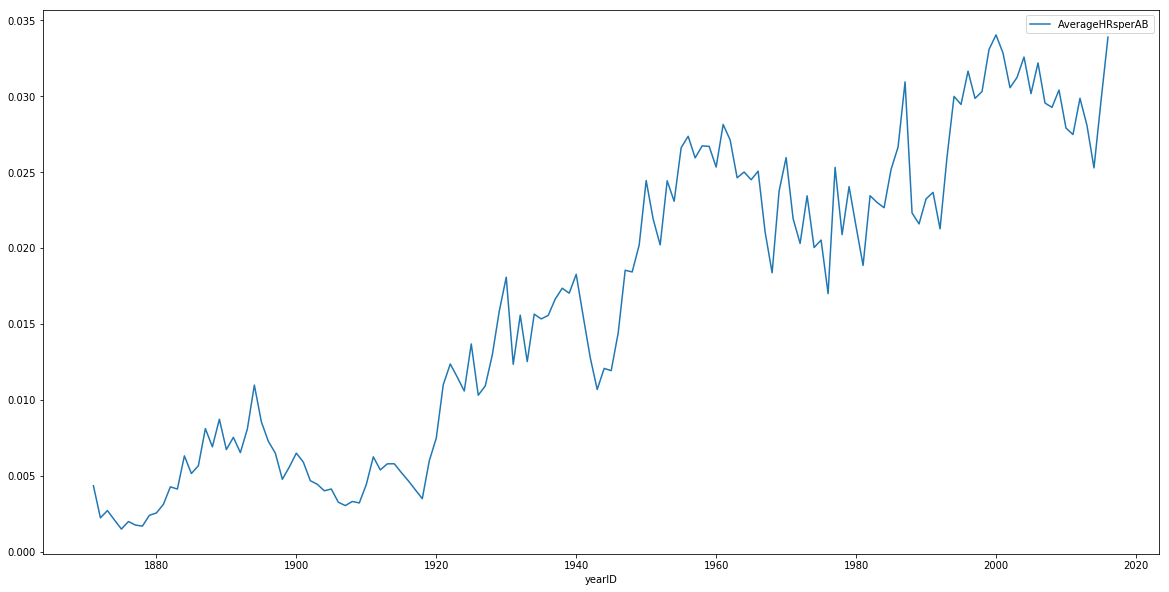

In [39]:
df1=df.groupby(['yearID'])['HR','AB'].sum().reset_index()
df1['AverageHRsperAB'] = df1['HR'] / df1['AB']
linegraph = df1.plot.line(x='yearID', y='AverageHRsperAB', figsize=(20,10), rot=0)
linegraph